<a href="https://colab.research.google.com/github/yonaan/PPG-BP/blob/preprocess/p040000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks


# If the CSV file is in Google Drive
# df = pd.read_csv('/content/drive/MyDrive/path/to/your/file.csv')

# If the CSV file is uploaded directly to Colab
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PPG_Signal/p040000.csv')  # Replace 'file.csv' with the path to your CSV file
print(df.head())  # Display the first few rows of the DataFrame

sys = df['Mean_NBP_Sys'].values
dia = df['Mean_NBP_Dias'].values

print(sys, ' / ', dia)

columns_to_remove = ['Mean_NBP_Sys', 'Mean_NBP_Dias']
cleaned_df = df.drop(columns=columns_to_remove)

print(cleaned_df.head())

          0         1         2         3         4         5         6  \
0  0.294118  0.290196  0.290196  0.290196  0.290196  0.286275  0.286275   

          7         8         9  ...      4192      4193      4194      4195  \
0  0.282353  0.282353  0.282353  ...  0.505882  0.505882  0.501961  0.498039   

       4196      4197      4198     4199  Mean_NBP_Sys  Mean_NBP_Dias  
0  0.494118  0.486275  0.482353  0.47451    112.517241      47.448276  

[1 rows x 4202 columns]
[112.51724138]  /  [47.44827586]
          0         1         2         3         4         5         6  \
0  0.294118  0.290196  0.290196  0.290196  0.290196  0.286275  0.286275   

          7         8         9  ...      4190      4191      4192      4193  \
0  0.282353  0.282353  0.282353  ...  0.505882  0.509804  0.505882  0.505882   

       4194      4195      4196      4197      4198     4199  
0  0.501961  0.498039  0.494118  0.486275  0.482353  0.47451  

[1 rows x 4200 columns]


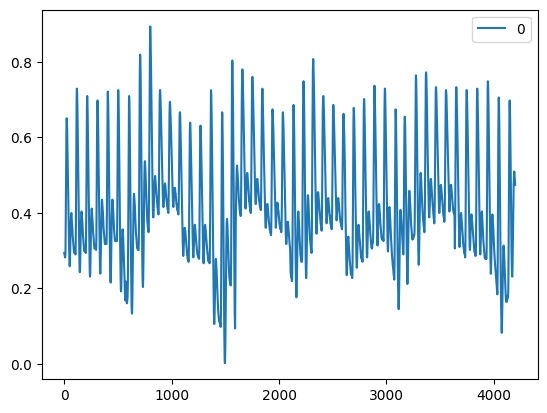

In [2]:
# Transpose the DataFrame
transposed_df = cleaned_df.T

# Plot a line graph of the transposed DataFrame
transposed_df.plot(kind='line')

# Display the plot
plt.show()

In [3]:
def find_peaks_in_data(data):
    """
    Find peaks in the data and plot them.

    Parameters:
    - data: DataFrame or Series with one row or transposed DataFrame

    Returns:
    - peaks: Dictionary containing indices and corresponding values of peaks
    """
    # Convert DataFrame or Series to numpy array
    values = data.values.flatten() if isinstance(data, pd.DataFrame) else data.values

    # Find peaks in the data
    peaks, _ = find_peaks(values)

    # Plot the data and highlight the peaks
    plt.plot(values, label='Data')
    plt.plot(peaks, values[peaks], 'ro', label='Peaks')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Peaks in Data')
    plt.legend()
    plt.show()

    # Return peaks as a dictionary containing indices and corresponding values
    peaks_dict = {'indices': peaks, 'values': values[peaks]}

    # Create a DataFrame containing peak values
    peak_values_df = pd.DataFrame({'Index': peaks, 'Value': values[peaks]})

    return peaks_dict, peak_values_df

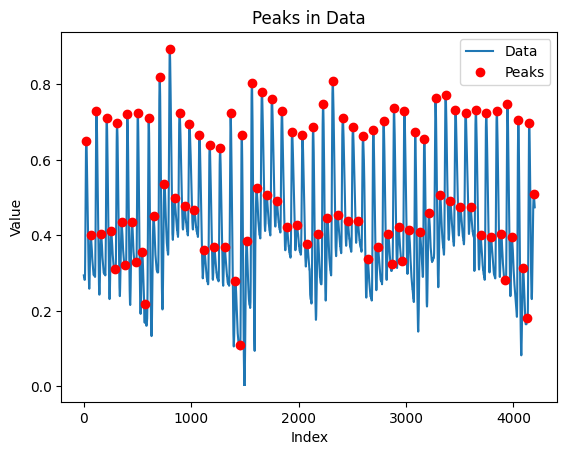

{'indices': array([  22,   65,  117,  161,  213,  256,  291,  309,  351,  387,  406,
        448,  484,  502,  544,  570,  604,  649,  706,  751,  800,  845,
        892,  938,  984, 1029, 1077, 1122, 1172, 1216, 1269, 1311, 1367,
       1412, 1451, 1470, 1515, 1564, 1609, 1658, 1703, 1751, 1797, 1844,
       1890, 1939, 1984, 2036, 2081, 2135, 2179, 2228, 2269, 2318, 2363,
       2412, 2457, 2505, 2550, 2600, 2645, 2696, 2739, 2792, 2835, 2871,
       2888, 2931, 2967, 2986, 3027, 3086, 3131, 3170, 3213, 3275, 3318,
       3369, 3413, 3461, 3506, 3555, 3601, 3650, 3695, 3747, 3792, 3846,
       3888, 3925, 3945, 3987, 4046, 4091, 4130, 4147, 4191]), 'values': array([0.65098039, 0.4       , 0.72941176, 0.40392157, 0.70980392,
       0.41176471, 0.30980392, 0.69803922, 0.43529412, 0.32156863,
       0.72156863, 0.43529412, 0.32941176, 0.7254902 , 0.35686275,
       0.21960784, 0.70980392, 0.45098039, 0.81960784, 0.5372549 ,
       0.89411765, 0.49803922, 0.7254902 , 0.47843137, 0.694117

In [4]:
peaks, peak_values_df = find_peaks_in_data(transposed_df)
print(peaks)
print(peak_values_df)

In [5]:
def remove_close_values_df(df, threshold=0.19):
    """
    Remove rows from a DataFrame where the difference between consecutive values is less than the specified threshold.

    Parameters:
    - df: DataFrame
    - threshold: float, minimum difference required to keep a value (default: 0.2)

    Returns:
    - filtered_df: DataFrame with close values removed
    """
    filtered_df = df.iloc[:1]  # Start with the first row

    for i in range(1, len(df)):
        if abs(df.iloc[i]['Value'] - filtered_df.iloc[-1]['Value']) >= threshold:
            filtered_df = pd.concat([filtered_df, df.iloc[[i]]], ignore_index=True)

    return filtered_df


# Example usage
filtered_df = remove_close_values_df(peak_values_df)
print(filtered_df)

    Index     Value
0      22  0.650980
1      65  0.400000
2     117  0.729412
3     161  0.403922
4     213  0.709804
..    ...       ...
82   3945  0.749020
83   3987  0.396078
84   4046  0.705882
85   4091  0.313725
86   4147  0.698039

[87 rows x 2 columns]


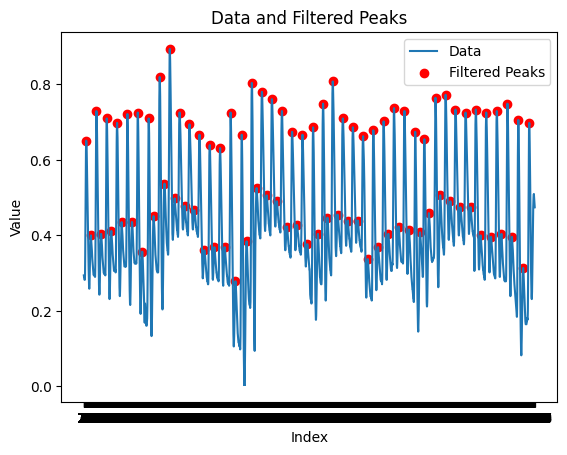

In [6]:
# Plot transposed_df as a line plot
plt.plot(transposed_df.index, transposed_df.values.flatten(), label='Data')

# Plot filtered_df as a scatter plot with dots
plt.scatter(filtered_df['Index'], filtered_df['Value'], color='red', label='Filtered Peaks')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Data and Filtered Peaks')
plt.legend()

# Show plot
plt.show()


In [7]:
def split_values_high_low(filtered_df, threshold=0.6):
    """
    Split values in filtered_df into two arrays based on the specified threshold for high values.

    Parameters:
    - filtered_df: DataFrame containing filtered values
    - threshold: float, minimum value required to be considered as high (default: 0.6)

    Returns:
    - high_values: list of high values (greater than or equal to threshold)
    - low_values: list of low values (less than threshold)
    """
    high_values = []
    low_values = []

    for value in filtered_df['Value']:
        if value >= threshold:
            high_values.append(value)
            low_values.append(None)  # Placeholder for low value
        else:
            high_values.append(None)  # Placeholder for high value
            low_values.append(value)

    return high_values, low_values



high_values, low_values = split_values_high_low(filtered_df)
print(high_values)
print(low_values)


[0.6509803921568628, None, 0.7294117647058823, None, 0.7098039215686275, None, 0.6980392156862745, None, 0.7215686274509804, None, 0.7254901960784313, None, 0.7098039215686275, None, 0.8196078431372549, None, 0.8941176470588236, None, 0.7254901960784313, None, 0.6941176470588235, None, 0.6666666666666666, None, 0.6392156862745098, None, 0.6313725490196078, None, 0.7254901960784313, None, 0.6666666666666666, None, 0.803921568627451, None, 0.7803921568627451, None, 0.7607843137254902, None, 0.7294117647058823, None, 0.6745098039215687, None, 0.6666666666666666, None, 0.6862745098039216, None, 0.7490196078431373, None, 0.807843137254902, None, 0.7098039215686275, None, 0.6862745098039216, None, 0.6627450980392157, None, 0.6784313725490196, None, 0.7019607843137254, None, 0.7372549019607844, None, 0.7294117647058823, None, 0.6745098039215687, None, 0.6549019607843137, None, 0.7647058823529411, None, 0.7725490196078432, None, 0.7333333333333333, None, 0.7254901960784313, None, 0.73333333333

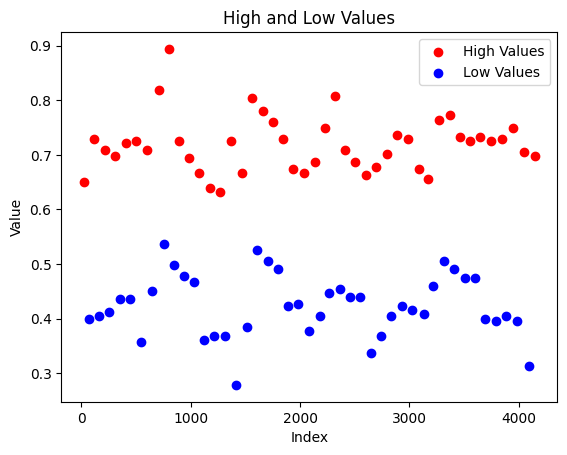

In [8]:
# Plot high values
plt.scatter(filtered_df['Index'], high_values, color='red', label='High Values')

# Plot low values
plt.scatter(filtered_df['Index'], low_values, color='blue', label='Low Values')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('High and Low Values')
plt.legend()

# Show plot
plt.show()


In [11]:
# Calculate the average of high values
average_high = np.mean([value for value in high_values if value is not None])

# Calculate the average of low values
average_low = np.mean([value for value in low_values if value is not None])

print("Average High Value:", average_high)
print("Average Low Value:", average_low)



Average High Value: 0.7190730837789663
Average Low Value: 0.42416780665754666
